<h1>NumPy</h1>

<h3>(Otherwise Python is just too slow and cumbersome.)</h3>

In [ ]:
# To use the numpy module we need to import it.
# If you didn't already have the module,
# you would first need to get it (e.g. via Anaconda Navigator).
import numpy

In [ ]:
a1 = numpy.array([1,2,3,4,5,6,7,8])
a1

In [ ]:
type(a1)

<h1>Show how to add modules via Anaconda Navigator</h1>

<h1>ndarray (n-dimensional array)</h1>

<h3>shape = (rows, columns, depth, higher dimensions...)</h3>

In [ ]:
import numpy as np

a2 = np.array([[1,2],[3,4],[5,6]])
a2

In [ ]:
a1.shape, a2.shape

In [ ]:
a2.shape[0]

In [ ]:
a3 = a1.reshape((2,2,2))
a3

<h1>Indexing</h1>

<h3>[rows, columns, depth, ...]</h3>

![NumPy indexing](numpy_indexing.png)

<h1>Exercises</h1>

In [ ]:
# the above pictured matrix
a = np.arange(36).reshape((6,6)) + np.arange(6).reshape((6,1)) * 4
a

1. Change the value of the element in the 3rd row and 2nd column to 100.

2. Set every other row in the last column to zero.

<h1>Follow the link below for a graphical tour of ndarrays</h1>

[Let's check out Jay Alammar's graphical depictions of ndarrays!](http://jalammar.github.io/visual-numpy/)

In [ ]:
np.zeros((2,3))

In [ ]:
shape = (2,3)
np.ones(shape)

In [ ]:
mat = np.random.random((2,3,2))
mat

<h1>Broadcasting</h1>

![NumPy broadcasting](numpy_broadcasting.png)

In [ ]:
a = np.array([0,10,20,30]).reshape((-1,1))
b = np.array([0,1,2]).reshape((1,-1))
a

In [ ]:
b

In [ ]:
a+b

In [ ]:
a*b

In [ ]:
c = a*b*10
c

<h1>Reductions</h1>

In [ ]:
c.min(), c.max(), c.mean(), c.std()

In [ ]:
c.max(axis=0)  # max along rows

In [ ]:
c.max(axis=1)  # max along columns

<h1>EEG data</h1>

!!! Note, how I extracted the eeg data below is not important, it just happens to be how it is arranged in the data file. **What's important is that you can understand the arrangement of the eeg ndarray and manipulate it.**

In [1]:
from scipy.io import loadmat
data = loadmat('eeg.mat')  # load data saved in MATLAB format

# Grab relevant data into an ndarray with dimensions (channel, time, trial).
# Each channel is an electrode and each trial is a separate EEG recording from that electrode.
# So eeg is an ndarray where each row is a time series recording from a particular electrode channel
# and depth reflects repeated recordings from the same channel.
eeg = data["EEG"][0,0]["data"]  # [channel, time, trial]
time = data["EEG"][0,0]["times"][0]  # a 1d array of time points for the columns of eeg.

eeg.shape, time.shape

((64, 640, 99), (640,))

<h1>Exercises</h1>

1. Print the number of electrodes by getting it from eeg.shape. Use a formatted print statement to make it read nice.

2. Create a new variable **trace** that refers to the 3rd channel's 1st trial EEG record.

<h1>Plotting with Matplotlib</h1>

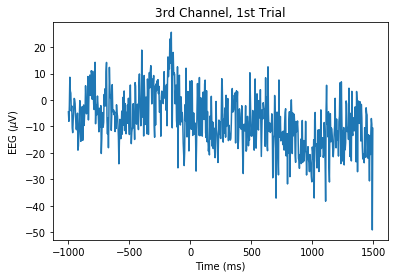

In [4]:
import matplotlib.pyplot as plt

trace = eeg[2,:,0]

plt.plot(time, trace)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");

<h1>Higher Resolution Plots</h1>

In [5]:
mport matplotlib as mpl
print(mpl.rcParams['figure.dpi'])
mpl.rcParams['figure.dpi'] = 150

72.0


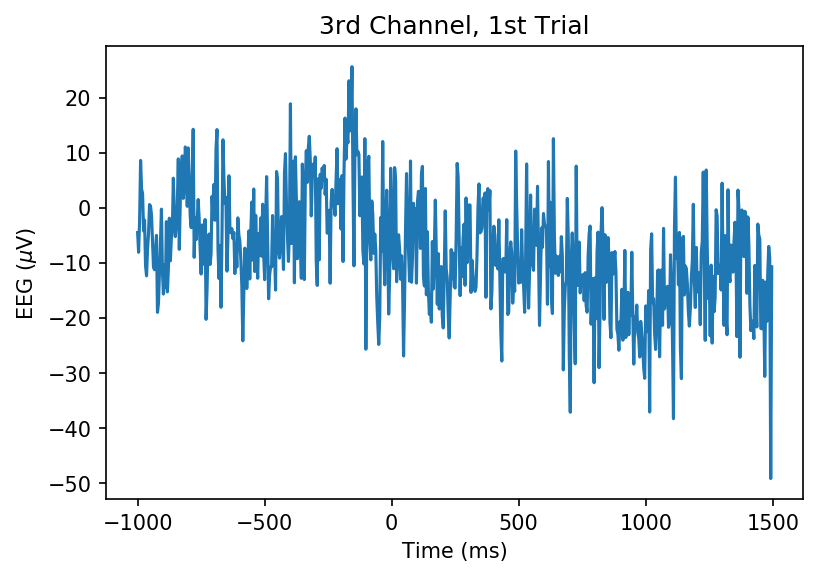

In [6]:
plt.plot(time, trace)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");

<h1>Interactive Plots</h1>

If the below cells fail to run, try these steps:

1. Install nodejs and ipympl modules
2. Run following commands in Terminal/Shell:
    * jupyter labextension install @jupyter-widgets/jupyterlab-manager
    * jupyter labextension install jupyter-matplotlib
    * jupyter nbextension enable --py widgetsnbextension
    * conda update jupyterlab
    * jupyter labextension update --all
3. Restart JupyterLab

In [2]:
# Restart the kernel and then execute this cell.
# Typically you would put this at the start of your notebook.
%matplotlib widget
import matplotlib.pyplot as plt

In [47]:
plt.figure()
plt.plot(time, eeg[2,:,0])
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, 1st Trial");

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

In [48]:
plt.plot(time, eeg[2,:,1]);
plt.plot(time, eeg[2,:,2]);
plt.title("3rd Channel, Trials 1-3")
plt.legend(["Trial 1", "Trial 2", "Trial 3"]);

In [49]:
plt.cla()

In [50]:
plt.plot(time, eeg[2,:,0])
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, Trial 1");

In [52]:
plt.figure()
plt.plot(time, eeg[2,:,:3], linewidth=.8)
plt.xlabel("Time (ms)")
plt.ylabel("EEG ($\mu$V)")
plt.title("3rd Channel, Trials 1-2")
plt.legend(["Trial 1", "Trial 2", "Trial 3"]);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to  previous…

<h1>Exercises</h1>

1. Plot the EEG record for the 50th trial in channels 1, 30 and 42.

2. Plot the average EEG across trials in channel 14.

3. Plot the average EEG across channels 1-10 for trial 82.

<h1>Timing your code</h1>

<h1>Numba</h1>